# Анализ успешности компьютерных игр

Исследование и анализ данных о продажах компьютерных игр, оценках пользователей и экспертов, жанрах и платформах с целью выявления определяющих успешность игры закономерностей, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина компьютерных игр.

**Ход исследования:**
* Изучение общей информации;
* Подготовка данных:
    - Предобработка данных;
    - Добавление дополнительной информации в таблицу;
* Исследовательский анализ данных:
    - Выделение актуального для анализа периода;
    - Исследование прибыльности платформ;
    - Анализ влияния отзывов на продажи;
    - Анализ прибыльности игр в зависимости от жанра;
* Составление портрета пользователя каждого региона;
* Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные;
* Итоги исследования.

In [222]:
# импорт библиотек

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
warnings.simplefilter(action='ignore')

## Данные

In [107]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [108]:
data = pd.read_csv('/content/gdrive/MyDrive/analysis_git/games.csv')
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9759,Touch My Katamari,PSV,2011.0,Puzzle,0.07,0.03,0.00,0.02,69.0,7.4,E10+
11460,Outlaw Golf,GC,2002.0,Sports,0.06,0.02,0.00,0.00,69.0,tbd,T
676,WWE SmackDown vs Raw 2008,PS2,2007.0,Fighting,0.92,0.00,0.01,1.41,71.0,7.2,T
12309,Guitar Freaks 3rdMIX & DrumMania 2ndMIX,PS2,2000.0,Simulation,0.00,0.00,0.06,0.00,NaN,NaN,NaN
12164,Backyard NFL Football '09,DS,2008.0,Sports,0.06,0.00,0.00,0.01,NaN,NaN,NaN
10758,Star Wars: Lethal Alliance,DS,2006.0,Action,0.08,0.01,0.00,0.01,57.0,tbd,E10+
5419,Disney Sing It: Pop Hits,PS2,2009.0,Misc,0.10,0.02,0.00,0.22,NaN,NaN,NaN
14429,Chaos;Head - Love Chu*Chu!,X360,2010.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1092,Spy Hunter,PS2,2001.0,Racing,1.13,0.32,0.00,0.22,84.0,7.8,T
618,Mario Party 2,N64,1999.0,Misc,1.28,0.14,1.08,0.01,NaN,NaN,NaN


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Согласно документации к данным:

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Есть пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`. Также есть проблемы с типами данных. Систематизируем наши находки.

| Столбец        | Замена типа           | Замена пропусков  |  Количество пропусков |
| ------------- |:-------------:|:-----:|:---------:|
| **Name**    | не требуется | удалить строки | 2 |
| **Platform**    | не требуется | не требуется | 0 |
| **Year_of_Release**    | int | не требуется | 269 |
| **Genre**    | не требуется | удалить строки | 2 |
| **NA_sales**    | не требуется | не требуется | 0 |
| **EU_sales**    | не требуется | не требуется | 0 |
| **JP_sales**    | не требуется | не требуется | 0 |
| **Other_sales**    | не требуется | не требуется | 0 |
| **Critic_Score**    | не требуется | не требуется | 8578 |
| **User_Score**    | float | не требуется | 6701 |
| **Rating**    | не требуется | "N/A" | 6766 |

## Подготовка данных

### Изменение типов данных

In [110]:
# приведение названий столбцов к нижнему регистру

data.columns = data.columns.str.lower()

Теперь изменим типы данных в тех столбцах, где это требуется.

 * **`year_of_release`**: float => **int**;

 * **`user_score`**: object => **float**;

  Рассмотрим столбец с пользовательской оценкой `user_score`. Его тип данных `object` объясняется тем, что в нем встречаются значения `tbd` (аббревиатура от английского To Be Determined (будет определено)). Значит, пользовательский рейтинг еще не определен. Так как тип `object` помешает дальнейшему использованию данных столбца `user_score` во время исследования, стоит сделать все значения `tbd` пустыми, а остальные значения привести к типу `float`.

In [111]:
try:
  data['year_of_release'] = data['year_of_release'].astype('Int64')
  data['user_score'] = data['user_score'].replace('tbd', np.nan).astype('float')
except Exception as exc:
  print(exc)

### Пропущенные значения

Теперь займемся обработкой пропущеннных значений. На этапе изучения общей информации было замечено, что в столбцах `name` и `genre` всего по два пропущенных значения, проверим их:

In [112]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Получается, что пропуски в этих столбцах находятся в один и тех же двух строках, которые к тому же почти полностью пустые и содержат информацию за 1993 год, который в будущем анализе точно не войдет в акутальный для исследования период. Поэтому их можно удалить.

In [113]:
data = data[data['name'].notna()]

Теперь рассмотрим столбец `year_of_release`. Пропусков в этом столбце немного - примерно 1.6% от всех данных. Однако в столбце с названиями игр можно заметить, в некоторых из них содержатся годы. Заполним некоторые пропуски в столбце `year_of_release` значениями года из названий игр.

In [114]:
# создание временного столбца, в котором будут храниться года, найденные в названиях
data['year_of_release_']  = data['name'].apply(lambda x: re.findall('\d\d\d\d', x))

# методом explode избавляемся от списков и переводим столбец year_of_release в тот же тип, что и year_of_relese
data = data.explode('year_of_release_')
try:
    data['year_of_release_'] = data['year_of_release_'].astype('float').astype('Int64')
except Exception as exc:
    print(exc)

# заполнение пропусков в year_of_relese найденными значениями из year_of_release_
data['year_of_release'] = data['year_of_release'].fillna(data['year_of_release_'])
# удаление временного столбца
data.drop('year_of_release_', axis=1, inplace=True)

Пропусков в столбце `year_of_release` стало немного меньше, остальные же оставим без изменений.

В столбцах `critic_score`, `user_score` пропусков слишком много, поэтому их заполнение любыми значениями может приветсти к сильному искажению результатов исследования, поэтому стоит оставить пропущенные значения пустыми.

Осталось изучить столбец `rating`.

In [115]:
data['rating'].value_counts()

rating
E       3992
T       2962
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

* `E` («Everyone») — «Для всех»

* `T` («Teen») — «Подросткам»

* `M` («Mature») — «Для взрослых»

* `E10+` («Everyone 10 and older») — «Для всех от 10 лет и старше»

* `EC` («Early childhood») — «Для детей младшего возраста»

* `RP` («Rating Pending») — «Рейтинг ожидается»

* `K-A` ("Kids to Adults") - то же самое, что и «E» («Everyone») (первоначальная версия обозначения)

* `AO` («Adults Only 18+») — «Только для взрослых»

В таблице есть как обозначения `E`, так и `K-A`. Они являются разными версиями одного обозначения, так что заменим все значения `K-A` на `E`. Пропуски напротив игр, у которых нет рейтинга от ESRB, заменим на значение `"не задано"`.

In [116]:
# Замена всех `K-A` на `E` и пропущенных значений на "N/A"

data['rating'] = data['rating'].replace('K-A', 'E').fillna("N/A")

### Удаление дубликатов

Стоит проверить таблицу на наличие полных дубликатов и удалить их.

In [117]:
# Проверка на полные дубликаты

print(f'Количество полных дубликатов: {data.duplicated().sum()}')
data = data.drop_duplicates()
print(f'Дубликаты удалены.')

Количество полных дубликатов: 4
Дубликаты удалены.


### Добавление дополнительных столбцов

Теперь все проблемы с данными в таблице устранены. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`

In [118]:
# Подсчет суммарных продаж во всех регионах

data['total_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])

In [119]:
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11344,Chibi Maruko-Chan: Harikiri 365-Nichi no Maki,SNES,1991,Misc,0.00,0.00,0.08,0.00,NaN,NaN,N/A,0.08
11584,Final Fantasy XI: Vana'diel Collection 2008,PS2,2007,Role-Playing,0.03,0.03,0.01,0.01,NaN,NaN,T,0.08
7678,Baja: Edge of Control,X360,2008,Racing,0.12,0.06,0.00,0.02,65.0,7.1,E,0.20
15364,Atari Flashback Classics: Volume 1,XOne,2016,Misc,0.02,0.00,0.00,0.00,NaN,NaN,E,0.02
9398,Chicken Run,PS,2000,Adventure,0.07,0.05,0.00,0.01,75.0,6.2,E,0.13
5528,Alien: Isolation,PS3,2014,Shooter,0.12,0.16,0.00,0.05,NaN,8.3,M,0.33
9623,Indianapolis 500 Legends,Wii,2007,Racing,0.12,0.00,0.00,0.01,47.0,6.7,E,0.13
208,Guitar Hero III: Legends of Rock,PS2,2007,Misc,3.49,0.01,0.01,1.48,82.0,8.2,T,4.99
6937,Divinity II: Ego Draconis,X360,2009,Role-Playing,0.18,0.04,0.00,0.02,62.0,6.4,M,0.24
6214,The Smurfs: Dance Party,Wii,2011,Misc,0.21,0.04,0.00,0.02,NaN,NaN,E,0.27


In [120]:
# оценка результатов

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16461 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


**Вывод:**

Изменения, которые были внесены в таблицу:

 - Названия столбцов приведены к нижнему регистру;
 - Изменены типы данных в столбцах `year_of_relese`(int), `critic_score`(int), `user_score`(float);
 - Удалены строки с пропусками в `name` и `genre`. В столбце `year_of_release` некоторые пропуски заполнены годами из названий игр, а в столбце `rating` пропуски заменены на "N/A"
 - В столбце `rating` исправлены неявные дубликаты
 - Все полные строки-дубликаты удалены из таблицы
 - Добавлен новый столбец `total_sales` с суммарным числом продаж каждой игры.

Все проблемы с данными успешно устранены, таблица готова к работе.

## Исследовательский анализ данных

### Определение актуального периода

Попробуем выделить актуальный период для будущего анализа данных. Для этого сначала посмотрим, сколько игр выпускалось в разные годы.

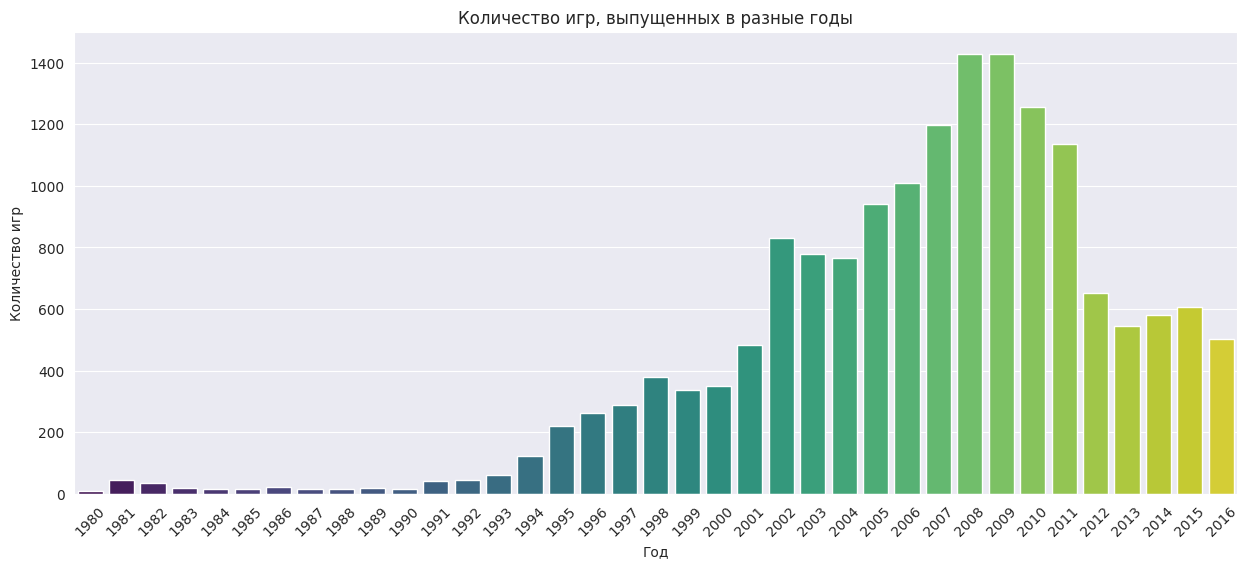

In [121]:
# создание сводной таблицы с числом выпущенных игр за каждый год
df_games_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()


sns.set({'figure.figsize':(15,6)})
plt.figure()
ax = sns.barplot(x='year_of_release', y='name', data=df_games_years, palette='viridis')
ax.set_xticklabels(df_games_years['year_of_release'], rotation=45)
ax.set_xlabel("Год")
ax.set_ylabel("Количество игр")
plt.title('Количество игр, выпущенных в разные годы')
plt.show()

Итак, по графику можно заметить, что вплоть до 2009 года количество выпускаемых игр неуклонно возрастало, но в период с 2009 по 2016 число игр с каждым годом начинает уменьшаться. Для прогнозирования данных на 2017, скорее всего, будут важны данные за 2010-2016 годы, однако прежде чем точно выделить актуальный для анализа период, стоит оценить продажи игр в разбивке по платформам.

Сначала выберем платформы с наибольшими суммарными продажами.

In [122]:
data.pivot_table(index='platform', values='total_sales', aggfunc="sum").sort_values(by='total_sales', ascending=False).head(6)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


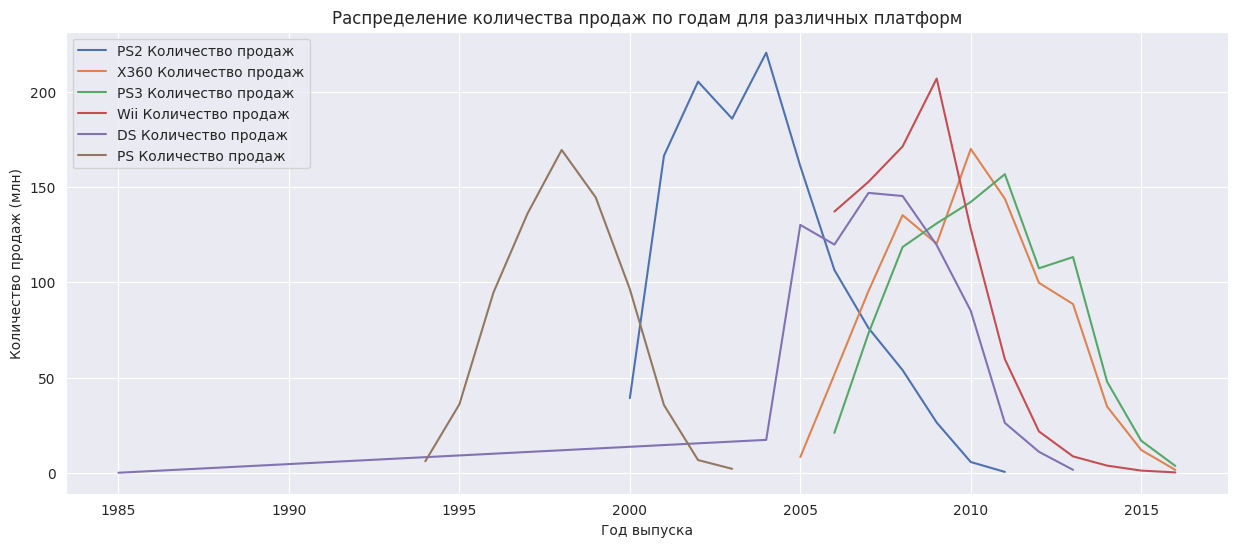

In [123]:
fig, ax = plt.subplots(figsize=(15, 6))

for platform_name in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    platform_data = (data[(data['platform'] == platform_name)]
                    .pivot_table(index='year_of_release', values='total_sales', aggfunc="sum"))
    ax.plot(platform_data.index, platform_data['total_sales'], label=f'{platform_name} Количество продаж')

ax.set_title('Распределение количества продаж по годам для различных платформ')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество продаж (млн)')
ax.grid(True)
ax.legend()

plt.show()

Получается, что бОльшая часть платформ с высокими продажами появились в течение последних 10 лет и время жизни платформы на рынке в среднем составляет около 10 лет. Учитывая это и выводы из суммарных продаж в последние годы, стоит обратить особое внимание на недавно появившиеся и только набирающие обороты платформы, так как у них есть большие шансы быть прибыльными в будущем, в то время как рассмотренные платформы появились как раз около 10 лет назад, а продажи их к 2016 уже начали сильно падать. **Поэтому выделим  актуальным для анализа и прогноза данных на будущий 2017 год период с 2013 по 2016 год.**

In [124]:
# таблица с данными только за выделенный актуальный период

data = data[data['year_of_release'] >= 2013]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,N/A,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,N/A,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Исследование прибыльности разных платформ

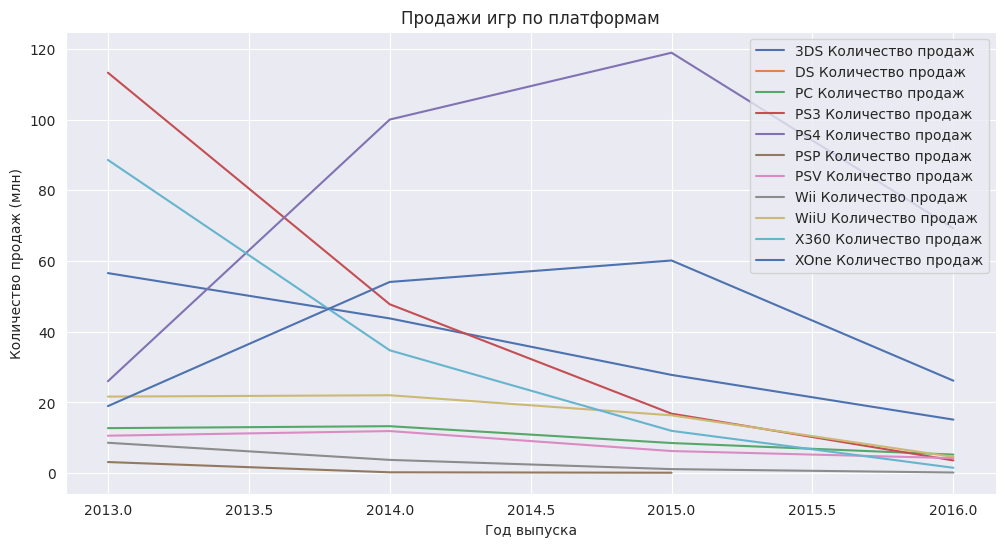

In [125]:
fig, ax = plt.subplots(figsize=(12, 6))
pivot = data.pivot_table(index='platform', values='total_sales', aggfunc="sum")

for platform_name in pivot.index:
    platform_data = (data[(data['platform'] == platform_name)]
                    .pivot_table(index='year_of_release', values='total_sales', aggfunc="sum"))
    ax.plot(platform_data.index, platform_data['total_sales'], label=f'{platform_name} Количество продаж')

ax.set_title('Продажи игр по платформам')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество продаж (млн)')
ax.grid(True)
ax.legend()

plt.show()

В 2016 в продажах всех платформ наблюдается сильный спад из-за неполноты данных за этот год, однако все же можно выделить платформы **`PS4`**, **`XOne`** и **`3DS`** как потенциально прибыльные, так как последние несколько лет именно они лидируют по продажам. Также не стоит сбрасывать со счетов **`PC`** - игры на компьютеры будут выходить всегда, хотя и пользуются меньшей популярностью. Продажи остальных платформ уже в 2016 близятся к нулю, а исходя из анализа наиболее популярных платформ за все время можно сделать вывод, что после такого сильного спада в продажах, они уже не возрастут, поэтому ждать от них роста в 2017 не стоит.

In [126]:
# таблица с данными за актуальный период для четырех выбранных потенциально прибыльными платформ

profitable = data.query('platform in ["PS4", "XOne", "3DS", "PC"]')

Проанализируем глобальные продажи в разбивке по платформам за актуальный период.

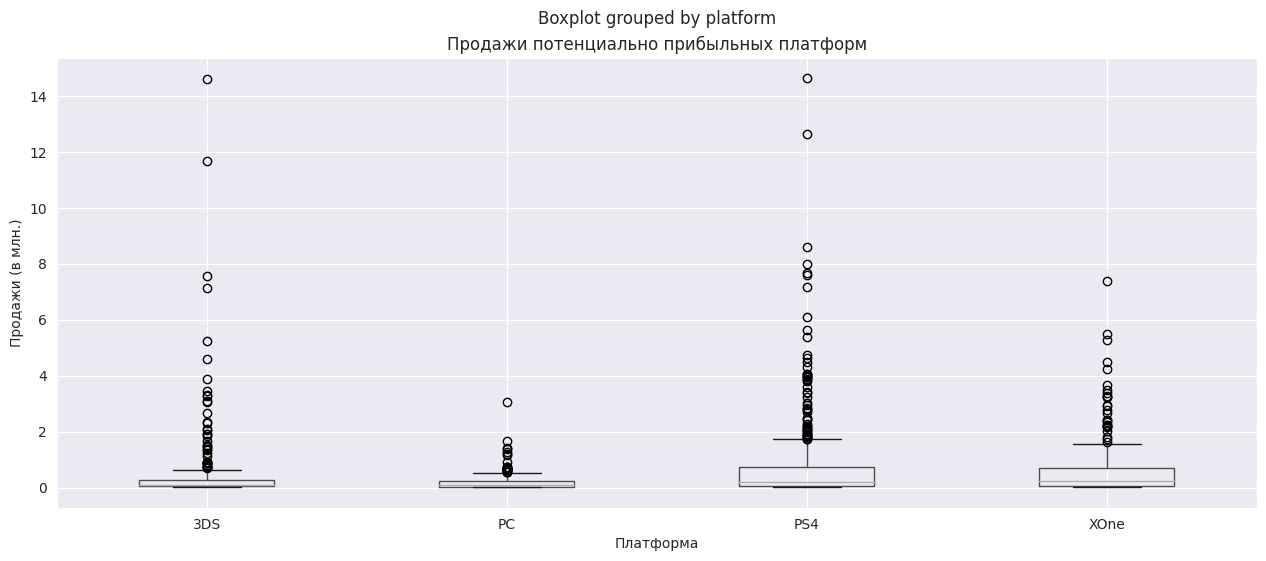

In [136]:
ax = profitable.boxplot('total_sales', by='platform')
ax.set_title('Продажи потенциально прибыльных платформ')
ax.set_xlabel("Платформа")
ax.set_ylabel("Продажи (в млн.)")
plt.show()

На графике много выбросов, мешающих полноценному анализу, поэтому стоит дополнительно рассмотреть нижнюю часть boxplot-ов:

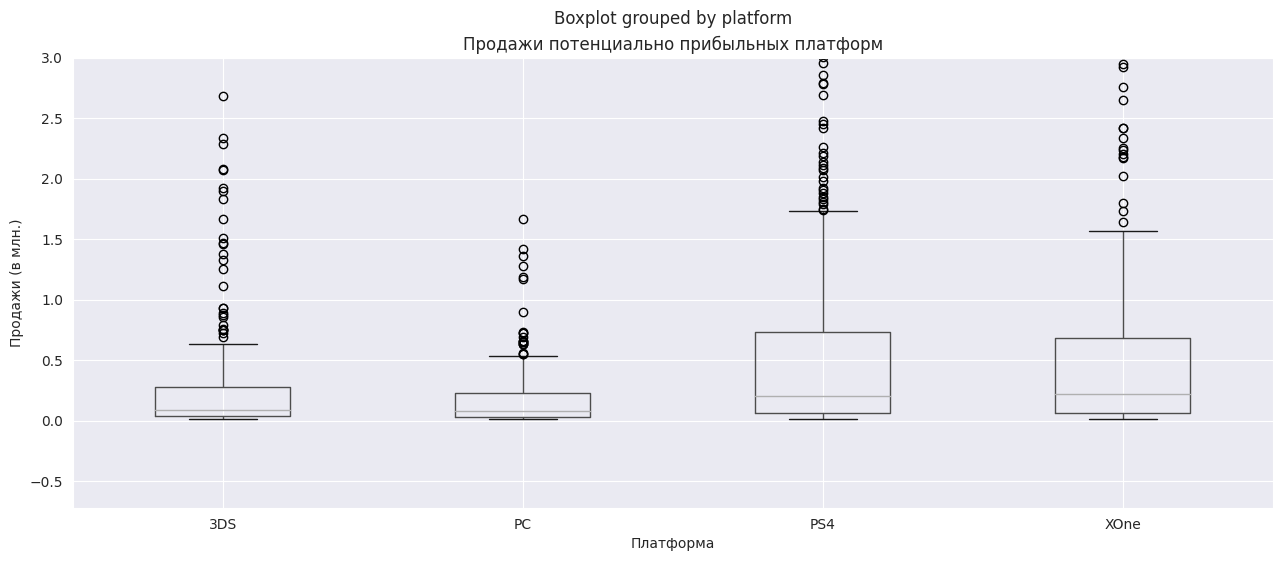

In [128]:
ax = profitable.boxplot('total_sales', by='platform')
ax.set_title('Продажи потенциально прибыльных платформ')
ax.set_xlabel("Платформа")
ax.set_ylabel("Продажи (в млн.)")
plt.ylim(top=3)
plt.show()

В основном, продажи большинства игр на всех платформах не превышают 2-х миллионов, однако у всех платформ есть довольно много выбросов, которые обозначают игры с необычно высокими продажами. Особенно выделяются платформы **PS4** и **3DS**, которые содержат наиболее высокие выбросы (за актуальный период выпустили наиболее популярные игры (> 14 млн проданных копий)). Самая популярная игра на платформе **XOne** не превышает 8 млн проданных копий.

Продажи игр на **PC** в основном не превышают полумиллиона, а наиболее популярные игры могут продаваться в количестве от миллиона до двух миллионов копий.

Медианное количество продаж на платформе **3DS** составляет примерно 100 000, а продажи 75% игр на этой платформе не превышают 300 000 проданных копий. Графики платформ **PS4** и **XOne** во многом похожи: медианное число продаж составляет около 200 000, а 75% значений не превышает 750 000 проданных копий.

### Анализ влияния отзывов на продажи

Рассмотрим одну из выделенных потенциально прибыльных платформ - **PS4**. На ее примере посмотрим, как влияют на продажи отзывы пользователей и критиков.


Коэффициент корреляции продаж с параметром user_score: -0.032
Коэффициент корреляции продаж с параметром critic_score: 0.407



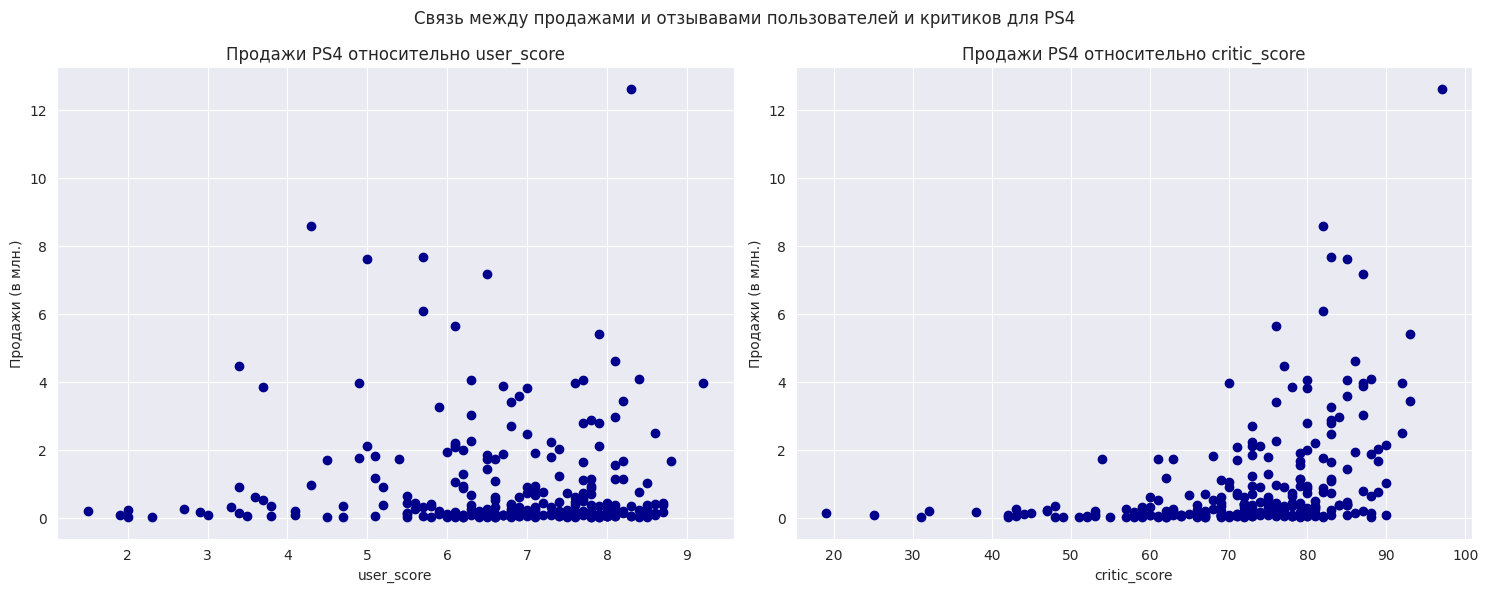

In [145]:
# Создаем фигуру и оси для двух сабплотов в одном ряду
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 строка, 2 колонки

scores = ['user_score', 'critic_score']
print()

for i, score in enumerate(scores):
    # Фильтруем данные для PS4
    ps4_data = profitable.query('platform == "PS4"')

    # Строим график рассеяния на соответствующей оси
    axs[i].scatter(ps4_data[score], ps4_data['total_sales'], c='DarkBlue')
    axs[i].grid(True)
    axs[i].set_title(f'Продажи PS4 относительно {score}')
    axs[i].set_xlabel(score)
    axs[i].set_ylabel('Продажи (в млн.)')

    # Вычисляем коэффициент корреляции
    corr = ps4_data[score].corr(ps4_data['total_sales'])
    print(f'Коэффициент корреляции продаж с параметром {score}: {round(corr, 3)}')

print()
# Добавляем общий заголовок для всей фигуры
fig.suptitle('Связь между продажами и отзывавами пользователей и критиков для PS4')

plt.tight_layout()  # Опционально, для улучшения расположения элементов
plt.show()

Коэффициент корреляции между количеством продаж и отзывами пользователей отрицателен и составляет всего 3%, следовательно между этими двумя параметрами нет никакой связи. По графику также можно увидеть, что есть игры с высокими продажами несмотря на довольно низкие пользовательские оценки.

А вот коэффициент корреляции между количеством продаж и оценками критиков намного выше предфдущего и составляет 40%. Это значение указывает на среднюю связь между этими двумя параметрами. По диаграмме рассеяния видно, что чем больше оценка критиков, тем чаще встречаются игры с большим количеством продаж.

Коэффициенты корреляции между продажами и отзывами для XOne, 3DS и PC:


,XOne,3DS,PC
user_score,-0.068925,0.241504,-0.090552
critic_score,0.416998,0.357057,0.197390


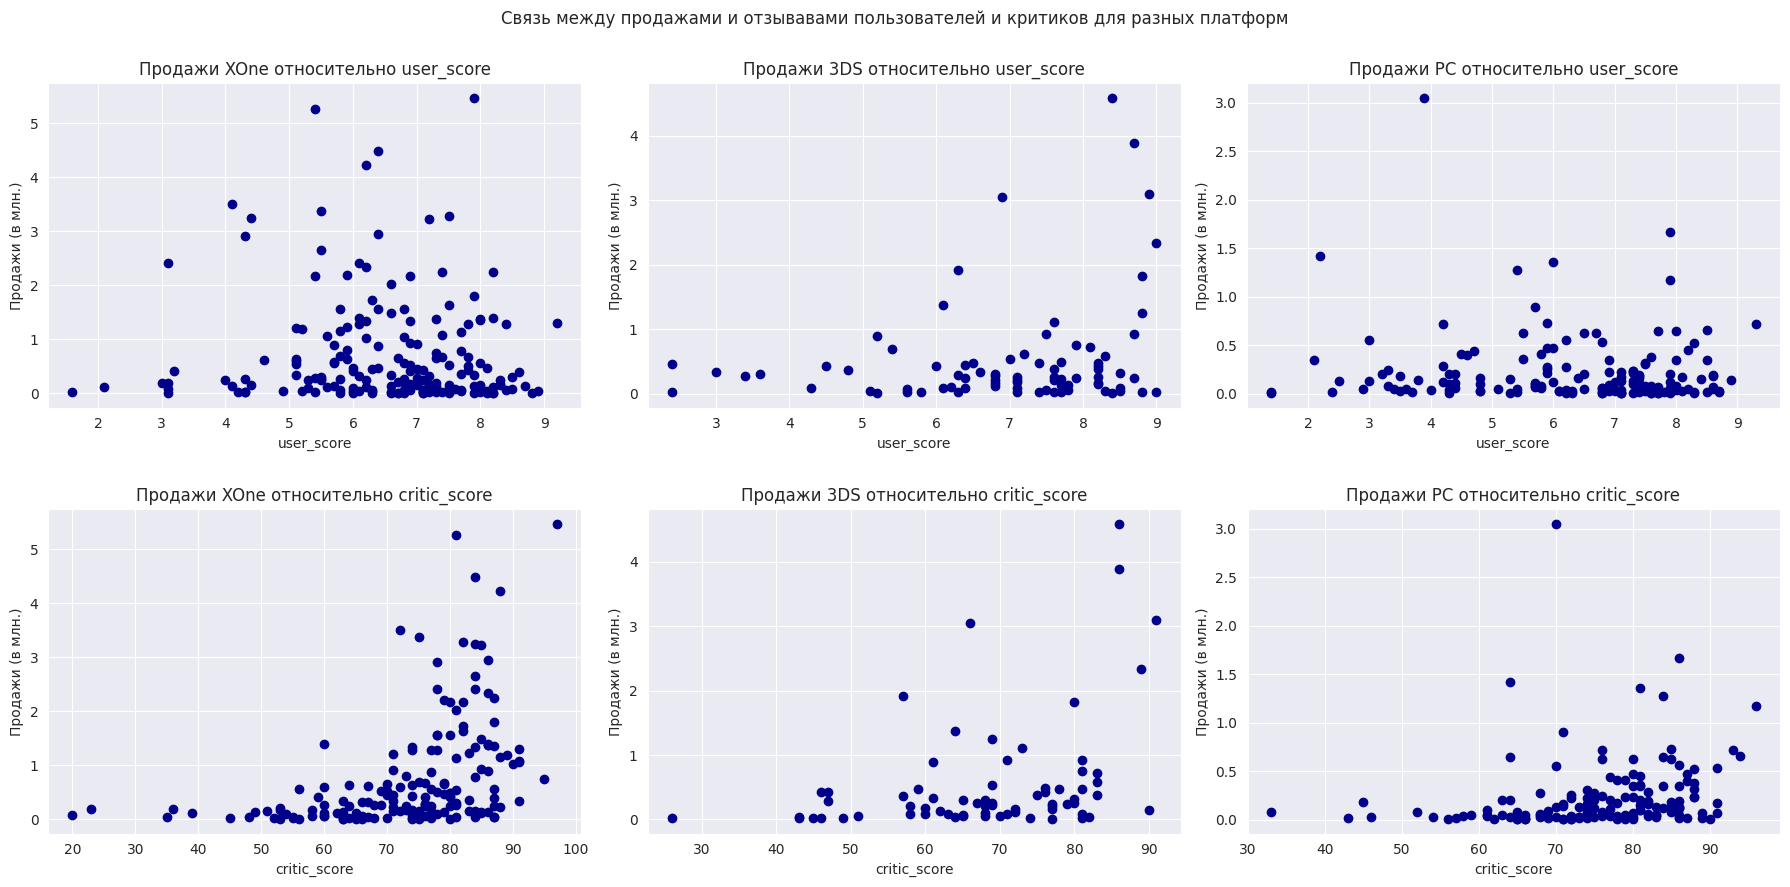

In [163]:
print(f'Коэффициенты корреляции между продажами и отзывами для XOne, 3DS и PC:')
display(pd.DataFrame([
    [profitable.query('platform == "XOne"')['user_score'].corr(profitable['total_sales']),
     profitable.query('platform == "3DS"')['user_score'].corr(profitable['total_sales']),
     profitable.query('platform == "PC"')['user_score'].corr(profitable['total_sales'])],
    [profitable.query('platform == "XOne"')['critic_score'].corr(profitable['total_sales']),
     profitable.query('platform == "3DS"')['critic_score'].corr(profitable['total_sales']),
     profitable.query('platform == "PC"')['critic_score'].corr(profitable['total_sales'])]],
    columns=['XOne', '3DS', 'PC'], index=['user_score', 'critic_score']))

print()
fig, axs = plt.subplots(2, 3, figsize=(18, 9))  # 2 строки, 3 колонки

platforms = ['XOne', '3DS', 'PC']
scores = ['user_score', 'critic_score']

for i, platform in enumerate(platforms):
    for j, score in enumerate(scores):
        platform_data = profitable.query(f'platform == "{platform}"')

        axs[j, i].scatter(platform_data[score], platform_data['total_sales'], c='DarkBlue')
        axs[j, i].grid(True)
        axs[j, i].set_title(f'\nПродажи {platform} относительно {score}')
        axs[j, i].set_xlabel(score)
        axs[j, i].set_ylabel('Продажи (в млн.)')

fig.suptitle('Связь между продажами и отзывавами пользователей и критиков для разных платформ')

plt.tight_layout()
plt.show()

**3DS**:

Относительно платформы **3DS** картина немного меняется. Здесь коэффициент корреляции между продажами и пользовательским рейтингом сильно возрос и равен 24%. Это говорит о том, что между этими двумя параметрами возможно есть слабая связь, однако такое число могло возникнуть и в результате случайности (под воздействием какого-то другого параметра). По графику можно заметить, что продажи почти всех игр этой платформы не превышают 2-х миллионов, за исключением нескольких игр, которые получили довольно высокую оценку от пользователей.

Значение коэффициента корреляции между продажами и оценками критиков для платформы **3DS** блико к аналогичному значению для платформы **PS4** и составляет почти 35%. Однако график визуально не сильно отличается от того, что был построен по пользовательскому рейтингу.

**XOne**:

Полученные данные по платформе **XOne** очень похожи на результаты по платформе **PS4**. Коэффициент корреляции между количеством продаж и отзывами пользователей отрицателен и составляет 6%, из чего следует, что связи между этими параметрами скорее всего нет. Многие игры имеют много продаж даже с довольно низкими оценками от пользователей.

Значение коэффициента корреляции между продажами и оценками критиков для платформы **XOne** равен 41%, что говорит о средней связи между этими параметрами. Действительно, по  графику также можно увидеть, что чем больше рейтинг от критиков, тем больше появляется игр с высокими продажами.

**PC**:

С пользовательскими оценками дела на **PC** обстоят так же, ка ки на других платформах, ни о какой связи с продажами игр утверждать нельзя.

Корреляция между продажами и оценками критиков ниже чем у остальных платформ.

### Анализ прибыльности игр относительно жанра

Теперь посмотрим на распределение игр по жанрам на этих трех выбранных платформах.

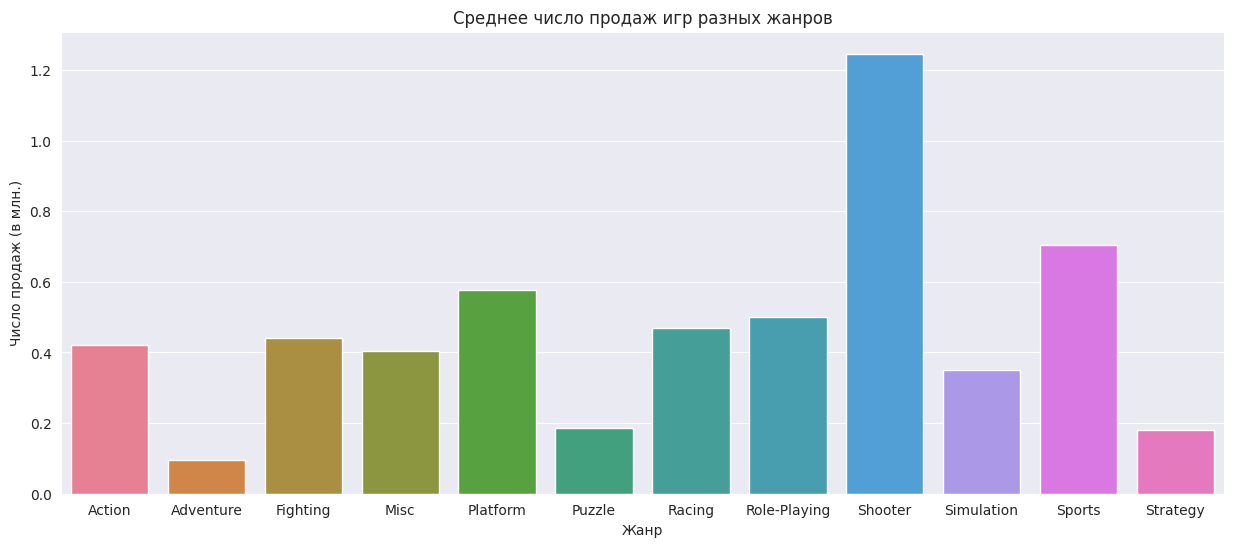

In [171]:
sns.set({'figure.figsize':(15,6)})
plt.figure()
ax = sns.barplot(data=data.pivot_table(columns='genre', values='total_sales', aggfunc='mean'))
ax.set_xlabel("Жанр")
ax.set_ylabel("Число продаж (в млн.)")
plt.title('Среднее число продаж игр разных жанров')
plt.show()

Наиболее продаваемым жанром оказался жанр **Shooter** (в среднем игры набирают около 1.2 млн. проданных копий). Чуть менее продаваемые, но все же выделающиеся на общем фоне: жанры **Platform** и **Sports** (в среднем более 500 тыс проданных копий). Наименее продаваемыми жанрами являются **Adventure**, **Puzzle** и **Strategy** (в среднем не достигают и 200 тыс. проданных копий)

**Вывод:**

 * Выделен актуальный для анализа и прогнозирования период: 2013-2016 гг.
 * Выбраны 3 потенциально прибыльные платформы: **PS4**, **XOne**, **3DS** и **PC** выбран как стабильная плтформа, которая вряд ли покажет сильно низкие результаты.
 * Проанализирована связь между продажами и отзывами пользователей и критиков: есть средняя связь продаж с рейтингом от критиков.
 * Определены наиболее продаваемые жанры (1 место: **Shooter**, 2 место: **Platform** и **Sports**) и наименее продаваемые (**Adventure**, **Puzzle** и **Strategy**)

## Составление портрета пользователя каждого региона

### Топ-5 популярных платформ в разных регионах

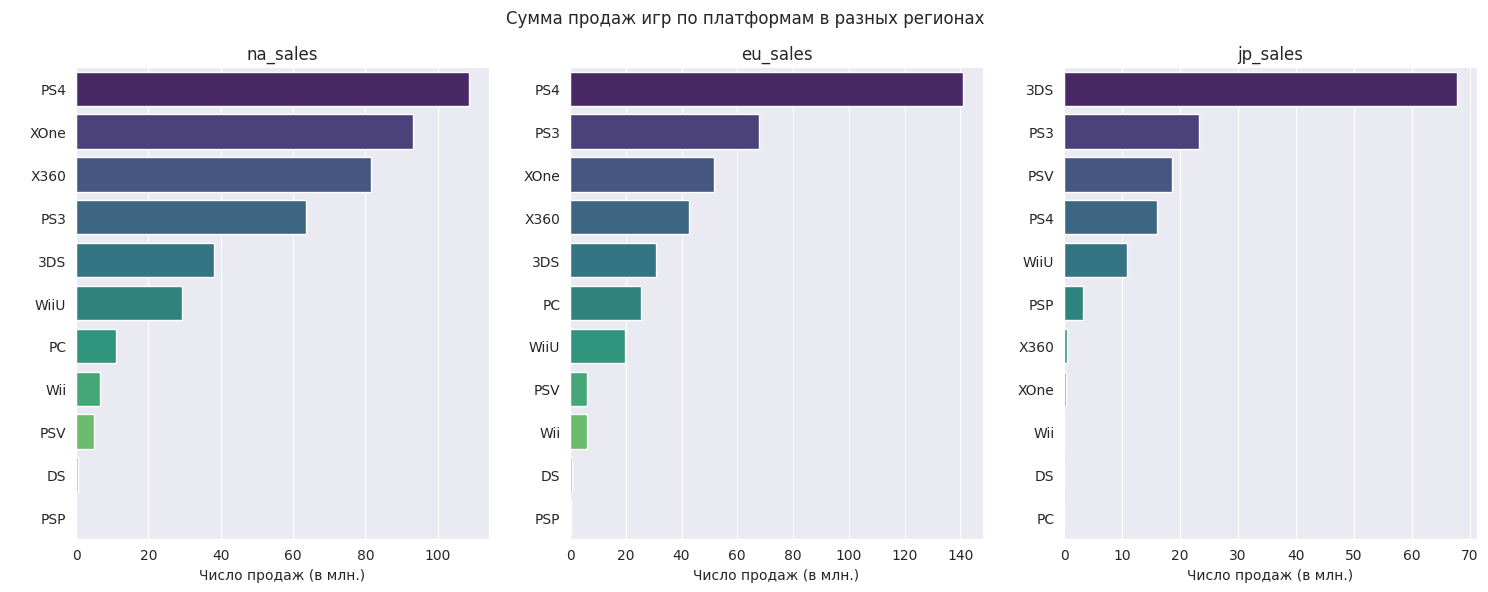

In [220]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

params = ['na_sales', 'eu_sales', 'jp_sales']

for ax, parametr in zip(axes, params):
    buf_df = data.pivot_table(index='platform', values=parametr, aggfunc='sum').sort_values(by=parametr, ascending=False)

    sns.barplot(y=buf_df.index, x=buf_df[parametr], ax=ax, palette='viridis')
    ax.set_title(parametr)
    ax.set_xlabel("Число продаж (в млн.)")
    ax.set_ylabel(" ")

plt.suptitle('Сумма продаж игр по платформам в разных регионах')
plt.tight_layout()
plt.show()

**Топ-5 популярных платформ в Северной Америке**:

 1. **`PS4`** - 25% от общего числа продаж в этом регионе

 2. **`XOne`** - 21%

 3. **`X360`** - 19%

 4. **`PS3`** - 15%

 5. **`3DS`** - 9%

 **Топ-5 популярных платформ в Европе**:

 1. **`PS4`** - 36% от общего числа продаж в этом регионе

 2. **`PS3`** - 17%

 3. **`XOne`** - 13%

 4. **`X360`** - 11%

 5. **`3DS`** - 8%

 **Топ-5 популярных платформ в Японии**:

 1. **`3DS`** - 48% от общего числа продаж в этом регионе

 2. **`PS3`** - 17%

 3. **`PSV`** - 13%

 4. **`PS4`** - 11%

 5. **`WiiU`** - 8%

### Топ-5 популярных жанров в разных регионах

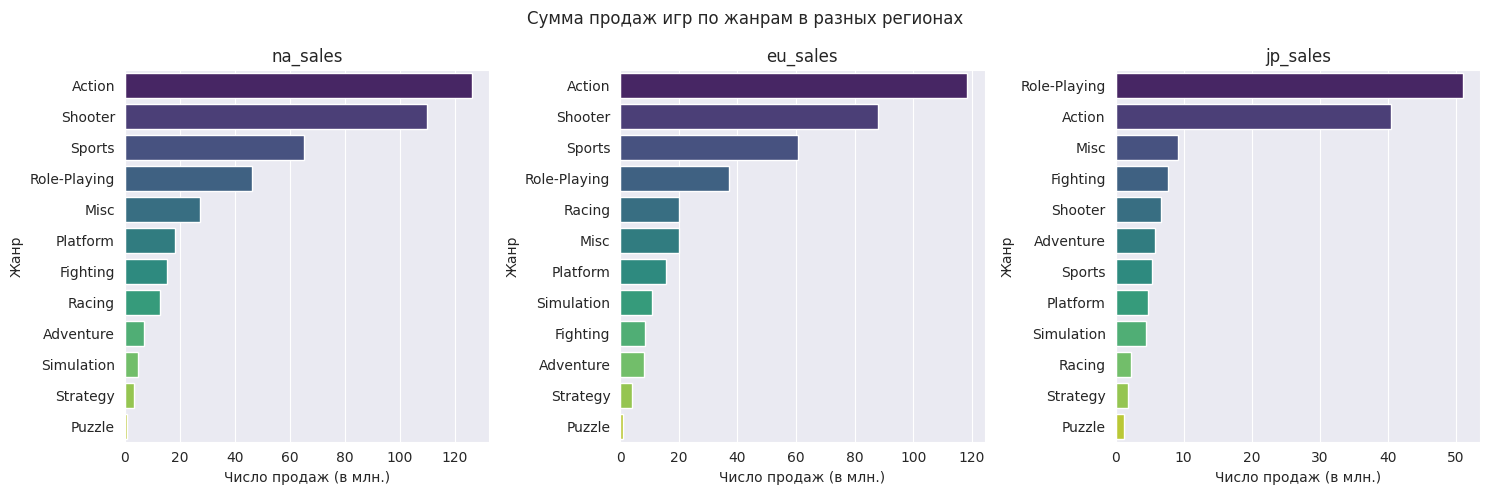

In [221]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

params = ['na_sales', 'eu_sales', 'jp_sales']

for ax, parametr in zip(axes, params):
    buf_df = data.pivot_table(index='genre', values=parametr, aggfunc='sum').sort_values(by=parametr, ascending=False)

    sns.barplot(y=buf_df.index, x=buf_df[parametr], ax=ax, palette='viridis')
    ax.set_title(parametr)
    ax.set_xlabel("Число продаж (в млн.)")
    ax.set_ylabel("Жанр")

plt.suptitle('Сумма продаж игр по жанрам в разных регионах')
plt.tight_layout()
plt.show()

**Топ-5 популярных жанров в Северной Америке**:

 1. **`Action`** - 29% от общего числа продаж в этом регионе

 2. **`Shooter`** - 25%

 3. **`Sports`** - 15%

 4. **`Role-Playing`** - 11%

 5. **`Misc`** - 6%

 **Топ-5 популярных жанров в Европе**:

 1. **`Action`** - 30% от общего числа продаж в этом регионе

 2. **`Shooter`** - 22%

 3. **`Sports`** - 15%

 4. **`Role-Playing`** - 9%

 5. **`Racing`** - 5%

 **Топ-5 популярных жанров в Японии**:

 1. **`Role-Playing`** - 36% от общего числа продаж в этом регионе

 2. **`Action`** - 29%

 3. **`Misc`** - 7%

 4. **`Fighting`** - 5%

 5. **`Shooter`** - 5%

### Влияние рейтинга ESRB на продажи в отдельном регионе

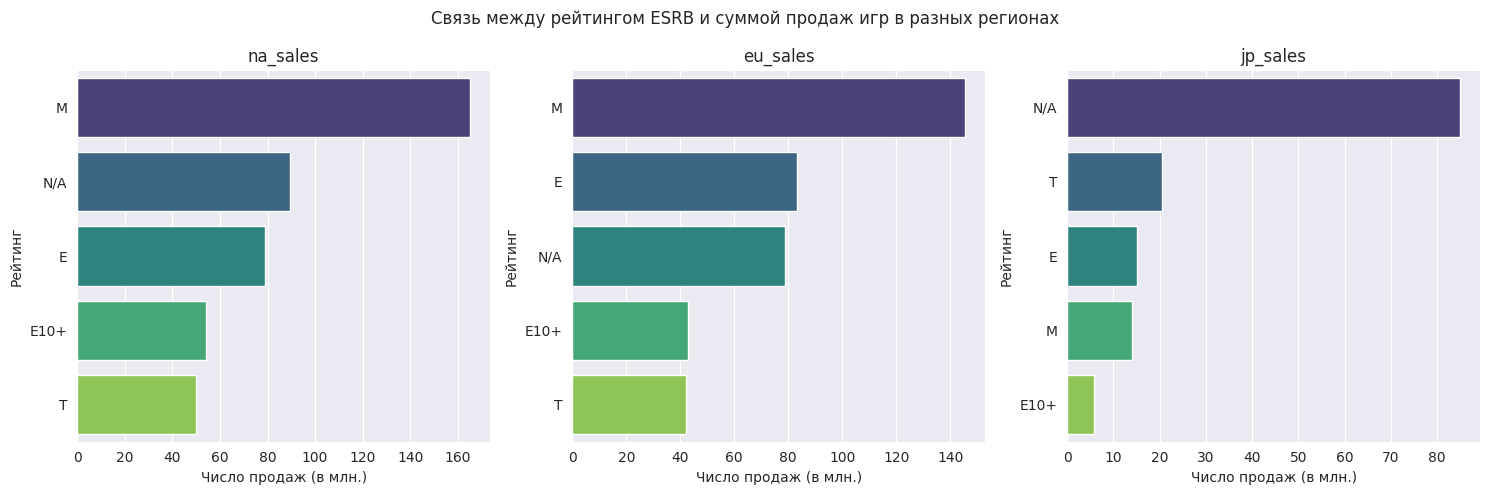

In [216]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

params = ['na_sales', 'eu_sales', 'jp_sales']

for ax, parametr in zip(axes, params):
    buf_df = data.pivot_table(index='rating', values=parametr, aggfunc='sum').sort_values(by=parametr, ascending=False)

    sns.barplot(y=buf_df.index, x=buf_df[parametr], ax=ax, palette='viridis')
    ax.set_title(parametr)
    ax.set_xlabel("Число продаж (в млн.)")
    ax.set_ylabel("Рейтинг")

plt.suptitle('Связь между рейтингом ESRB и суммой продаж игр в разных регионах')
plt.tight_layout()
plt.show()

Регионы Северной Америки и Европы очень похожи распределениями продаж по рейтингу ESRB. Большую часть продаж в этих регионах составляют игры рейтинга **`M`** (Для взрослых), остальные проданные игры в этих регионах имеют рейтинги **`E`** (Для всех), **`E10`** (Для всех старше 10 лет) или **`T`** (Для подростков).

Регион Японии отличается от двух остальных тем, что большинство игр вовсе не имеют рейтинга ESRB. Скорее всего, это обусловлено тем, что это американская ассоциация и далеко не все производители игр отправляют заявки на присвоение рейтинга в эту ассоциацию. Однако если судить по тем данным, что имеются, в Японии почти в равной степени продаются игры с рейтингами **`T`** (Для подростков), **`E`** (Для всех), **`M`** (Для взрослых) и **`E10`** (Для всех старше 10 лет)

**Вывод:**

 1. **Портрет пользователя из Северной Америки**

  * Предпочитает такие платформы как: **`PS4`**, **`XOne`**, **`X360`**, чуть меньше: **`PS3`**, **`3DS`**;
  
  * Предпочитает такие жанры как: **`Action`** и **`Shooter`**, чуть меньше: **`Sports`**, **`Role-Playing`** и **`Misc`**
  
  * Выбирает игры рейтинга **`M`** (Для взрослых), **`E`** (Для всех), **`E10`** (Для всех старше 10), и **`T`** (подросткам)
  
  
 2. **Портрет пользователя из Европы**
  
  * Предпочитает такие платформы как: **`PS4`**, **`PS3`**, **`XOne`**, чуть меньше: **`X360`**, **`3DS`**;
  
  * Предпочитает такие жанры как: **`Action`** и **`Shooter`**, чуть меньше: **`Sports`**, **`Role-Playing`** и **`Racing`**
  
  * Выбирает игры рейтинга **`M`** (Для взрослых), **`E`** (Для всех), **`E10`** (Для всех старше 10), и **`T`** (подросткам)
  
  
 3. **Портрет пользователя из Японии**

  * Предпочитает такие платформы как: **`3DS`**, **`PS3`**, чуть меньше: **`PSV`**, **`PS4`**, **`WiiU`**;
  
  * Предпочитает такие жанры как: **`Role-Playing`** и **`Action`**, чуть меньше: **`Misc`**, **`Fighting`** и **`Shooter`**
  
  * Выбирает игры рейтинга **`T`** (подросткам), **`E`** (Для всех), **`M`** (Для взрослых),  **`E10`** (Для всех старше 10)

## Проверка гипотез

### 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

  * **`H0`** - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

  * **`H1`** - между cредними пользовательскими оценками платформ Xbox One и PC есть разница.

In [223]:
# таблица без пропусков в user_score

score_notna = data[data['user_score'].notna()]

In [224]:
# проверка первой гипотезы

alpha = 0.01

results = st.ttest_ind(score_notna[score_notna['platform'] == 'XOne']['user_score'],
                      score_notna[score_notna['platform'] == 'PC']['user_score'])

print(f'р-значение: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение: 0.16390354211387628
Не получилось отвергнуть нулевую гипотезу


Вероятность получить наблюдаемые или еще более значимые различия значительно превышает порог в 1% (и даже порог в 5%). Данные не дают основания отвергуть нулевую гипотезу, гласящую, что средние пользовательсие рейтинги платформ Xbox One и PC одинаковые.

### 2: Средние пользовательские рейтинги жанров Action и Sports разные

  * **`H0`** - cредние пользовательские рейтинги жанров Action и Sports не отличаются.

  * **`H1`** - cредние пользовательские рейтинги жанров Action и Sports разные.

In [226]:
# проверка второй гипотезы

alpha = 0.01

results = st.ttest_ind(score_notna[score_notna['genre'] == 'Action']['user_score'],
                      score_notna[score_notna['genre'] == 'Sports']['user_score'])

print(f'р-значение: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение: 7.68963684307543e-28
Отвергаем нулевую гипотезу


Здесь же р-уровень значимости не переходит порог в 1%, значит данные о средних пользовательских рейтингах жанров Action и Sports противоречат `H0`, поэтому есть основание отвергнуть нулевую гипотезу, утверждающую, что cредние пользовательские рейтинги жанров Action и Sports не отличаются.

Так как получен статистически значимый результат, можно точечно сравнить средние значения пользовательских оценок двух выборок.

In [227]:
# средний рейтинг пользователей в зависимости от жанра

print(f"Средний пользовательский рейтинг жанра Action: {score_notna[score_notna['genre'] == 'Action']['user_score'].mean()}")
print(f"Средний пользовательский рейтинг жанра Sports: {score_notna[score_notna['genre'] == 'Sports']['user_score'].mean()}")

Средний пользовательский рейтинг жанра Action: 6.841794871794871
Средний пользовательский рейтинг жанра Sports: 5.238124999999999


Средняя оценка пользователей жанра Action выше рейтинга жанра Sports.

**Вывод:**

1) В случае первой гипотезы нет оснований отклонять нулевую гипотезу о равенстве пользовательских рейтингов пратформ `XOne` и `PC`

2) Нулевая гипотеза об отсутствии отличия между средними пользовательскими рейтингами в жанре `Action` и в жанре `Sports` отклонена, следовательно различие средних рейтингов статистически значимо.

## Итоги исследования

В результате исследовательского анализа данных:

 1. Выделен актуальный для прогнозирования период: 2013-2016 гг.

 2. По данным за актуальный период выбраны 3 потенциально прибыльных платформы: **PS4**, **XOne** и **3DS**. Платформа **PC** выделена как стабильная, от нее не ожидается более низких, чем обычно, результатов прибыльности.

 3. Определены наиболее продаваемые жанры (1 место: **Shooter**, 2 место: **Platform** и **Sports**) и наименее продаваемые (**Adventure**, **Puzzle** и **Strategy**).

 4. Составлены портреты пользователей каждого из трех регионов (Северная Америка, Европа и Япония), которые во многом подтвердили выбор потенциально прибыльных платформ:
    * Платформа **PS4** занимает первое по популярности место в регионах Северной Америки и Европы;
  
    * Платформа **XOne** в в регионах Северной Америки и Европы по популярности почти догоняет **PS4**;
  
    * В Японии наиболее популярна платформа **3DS** и наименее популярна платформа **PC**
  
    * Наиболее популярными жанрами в регионах Северной Америки и Европы являются жанры **Action**, **Shooter** и **Sports**
  
    * В Японии самые популярные жанры - **Role-Playing** и **Action**
  
    * В Америке и Европе наиболее продаваемыми являются игры с рейтингом `M` (Для взрослых) от ассоциации ESRB.